In [1]:
import warnings
warnings.filterwarnings('ignore')
import re
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.mpl_style = 'default'
from nltk.tokenize import word_tokenize
from util3 import *

## Load Files

In [2]:
df_train = pd.read_csv('./data/train.csv', encoding='ISO-8859-1')
df_test = pd.read_csv('./data/test.csv', encoding='ISO-8859-1')
df_desp = pd.read_csv('./data/product_descriptions.csv', encoding='ISO-8859-1')
df_attr = pd.read_csv('./data/attributes.csv', encoding='ISO-8859-1')
num_train = df_train.shape[0]

## Attributes

Explore what are the useful attributes and how to represent them as features.

In [86]:
df_attr['name'].value_counts()[:30]

Bullet02                       86248
Bullet03                       86226
MFG Brand Name                 86220
Bullet04                       86174
Bullet01                       85940
Product Width (in.)            61137
Bullet05                       60528
Product Height (in.)           54698
Product Depth (in.)            53652
Product Weight (lb.)           45175
Bullet06                       44901
Color Family                   41508
Bullet07                       34349
Material                       31499
Color/Finish                   28540
Bullet08                       26645
Certifications and Listings    24583
Bullet09                       20567
Assembled Height (in.)         18299
Assembled Width (in.)          18263
Assembled Depth (in.)          18198
Product Length (in.)           16705
Bullet10                       14763
Indoor/Outdoor                 12939
Bullet11                       11784
Commercial / Residential        9530
Bullet12                        8795
E

In [3]:
df_attr.dropna(inplace=True)

Among the top 30 attributes, some seem to be not very useful. They are:
- Certifications and Listings
- Package Quantity
- Hardware Included  

Spend some time to manually inspect the dataset.

In [4]:
def filter_str(df, s, col='search_term'):
    return df[df[col].str.lower().str.contains(s)]

In [124]:
filter_str(df, 'hardware')

,id,product_title,product_uid,relevance,search_term,product_description,brand,bullet,bullet_count,color,material,flag_commercial,flag_residential
375,1208,Liberty 3-3/4 in. Steel Bar Pull (25-Pack),100209,2.67,bathroom hardware knobs and pulls,"Sleek and sophisticated, this design makes a c...",Liberty,,0.0,,Steel,-1.0,-1.0
1416,4355,Martha Stewart Living 3-3/4 in. Bar Cabinet Ha...,100748,2.33,3/4' hardware,The Martha Stewart Living Country 3-3/4 in. Po...,Martha Stewart Living,,0.0,,Metal,-1.0,-1.0
1989,6161,Defiant Hartford Satin Nickel Entry Knob,101061,2.67,door lock hardware,"Featuring a lifetime guarantee, Defiant meets ...",Defiant,,0.0,,Stainless steel Metal,-1.0,-1.0
2180,6735,Martha Stewart Living 3-3/4 in. Dowel Cabinet ...,101158,3.00,3/4' hardware,The Martha Stewart Living Country 3-3/4 in. Be...,Martha Stewart Living,,0.0,,Metal,-1.0,-1.0
2295,7047,Oz-Post T4-850 4 in. Square Wood Post Anchor (...,101200,1.33,oz metal fence hardware,Oz-Post is one of the best ways to secure a wo...,Oz-Post,,0.0,,Metal,-1.0,-1.0
2337,7169,Liberty 2-3/4 in. or 3 in. Newton Cabinet Hard...,101223,2.00,3/4' hardware,The Liberty 2-3/4 or 3 in. Satin Nickel Dual-M...,Liberty,,0.0,,Metal,-1.0,-1.0
2339,7172,Liberty 2-3/4 in. or 3 in. Newton Cabinet Hard...,101223,3.00,kitchen cabinet drawer center-mount hardware,The Liberty 2-3/4 or 3 in. Satin Nickel Dual-M...,Liberty,,0.0,,Metal,-1.0,-1.0
2706,8370,HDX 4 ft. x 100 ft. 14-Gauge Welded Wire,101419,2.00,wire fences hardware,The HDX 4 ft. x 100 ft. Welded Wire is made of...,HDX,Silver,1.0,Silver,Metal,-1.0,-1.0
2965,9189,Liberty 2-1/2 in. or 3 in. Dark Oil Rubbed Bro...,101566,2.00,kitchen hardware,Use the Liberty Hardware 2-1/2 or 3 in. Dual M...,Liberty,,0.0,,Metal,-1.0,-1.0
2975,9221,Oz-Post Steel 2 Wood Fence Bracket Project Pac...,101571,2.33,wap around hardware,The WAP-238 from OZCO is a galvanized bracket ...,Oz-Post,,0.0,,Metal,-1.0,-1.0


In [151]:
filter_str(df_attr, 'energy star certified', 'name')['value'].value_counts()

No     6939
Yes    1481
Name: value, dtype: int64

### Brands

In [5]:
df_brand = df_attr[df_attr.name == 'MFG Brand Name'][['product_uid', 'value']].rename(columns={'value': 'brand'})

### Bullets

In [7]:
bullet = dict()
bullet_count = dict()
df_attr['about_bullet'] = df_attr['name'].str.lower().str.contains('bullet')
for idx, row in df_attr[df_attr['about_bullet']].iterrows():
    pid = row['product_uid']
    value = row['value']
    bullet.setdefault(pid, '')
    bullet_count.setdefault(pid, 0)
    bullet[pid] = bullet[pid] + ' ' + str(value)
    bullet_count[pid] = bullet_count[pid] + 1
df_bullet = pd.DataFrame.from_dict(bullet, orient='index').reset_index()
df_bullet_count = pd.DataFrame.from_dict(bullet_count, orient='index').reset_index().astype(np.float)
df_bullet.columns = ['product_uid', 'bullet']
df_bullet_count.columns = ['product_uid', 'bullet_count']

### Color

In [8]:
color = dict()
df_attr['about_color'] = df_attr['name'].str.lower().str.contains('color')
for idx, row in df_attr[df_attr['about_color']].iterrows():
    pid = row['product_uid']
    value = row['value']
    color.setdefault(pid, '')
    color[pid] = color[pid] + ' ' + str(value)
df_color = pd.DataFrame.from_dict(color, orient='index').reset_index()
df_color.columns = ['product_uid', 'color']

### Material

In [9]:
material = dict()
df_attr['about_material'] = df_attr['name'].str.lower().str.contains('material')
for idx, row in df_attr[df_attr['about_material']].iterrows():
    pid = row['product_uid']
    value = row['value']
    material.setdefault(pid, '')
    material[pid] = material[pid] + ' ' + str(value)
df_material = pd.DataFrame.from_dict(material, orient='index').reset_index()
df_material.columns = ['product_uid', 'material']

### Commercial / Residential Flag

In [10]:
comres_index = df_attr['name'].str.lower().str.contains('commercial / residential')

In [11]:
df_attr[comres_index]['value'].value_counts()

Commercial / Residential    5011
Residential                 4337
Commercial                   182
Name: value, dtype: int64

In [12]:
flag_comres = dict()
df_attr['about_comres'] = df_attr['name'].str.lower().str.contains('commercial / residential')
for idx, row in df_attr[df_attr['about_comres']].iterrows():
    pid = row['product_uid']
    value = row['value']
    flag_comres.setdefault(pid, [0, 0])
    if 'Commercial' in str(value):
        flag_comres[pid][0] = 1
    if 'Residential' in str(value):
        flag_comres[pid][1] = 1
df_comres = pd.DataFrame.from_dict(flag_comres, orient='index').reset_index().astype(np.float)
df_comres.columns = ['product_uid', 'flag_commercial', 'flag_residential']

### Indoor/Outdoor Flag

In [13]:
filter_str(df_attr, 'indoor/outdoor', 'name')['value'].value_counts()

Indoor                      7527
Indoor/Outdoor              3925
Outdoor                     1204
Indoor,Outdoor               256
Indoor/Outdoor (Covered)      47
Name: value, dtype: int64

In [14]:
flag_inoutdoor = dict()
df_attr['about_intoutdoor'] = df_attr['name'].str.lower().str.contains('indoor/outdoor')
for idx, row in df_attr[df_attr['about_intoutdoor']].iterrows():
    pid = row['product_uid']
    value = row['value']
    flag_inoutdoor.setdefault(pid, [0, 0])
    if 'Indoor' in str(value):
        flag_inoutdoor[pid][0] = 1
    if 'Outdoor' in str(value):
        flag_inoutdoor[pid][1] = 1
df_inoutdoor = pd.DataFrame.from_dict(flag_inoutdoor, orient='index').reset_index().astype(np.float)
df_inoutdoor.columns = ['product_uid', 'flag_indoor', 'flag_outdoor']

In [15]:
df_inoutdoor['flag_indoor'].value_counts()

1    11755
0     1203
Name: flag_indoor, dtype: int64

### Energy Star Flag

In [16]:
filter_str(df_attr, 'energy star certified', 'name')['value'].value_counts()

No     6939
Yes    1481
Name: value, dtype: int64

In [17]:
flag_estar = dict()
df_attr['about_estar'] = df_attr['name'].str.lower().str.contains('energy star certified')
for idx, row in df_attr[df_attr['about_estar']].iterrows():
    pid = row['product_uid']
    value = row['value']
    flag_estar.setdefault(pid, 0)
    if 'Yes' in str(value):
        flag_estar[pid] = 1
df_estar = pd.DataFrame.from_dict(flag_estar, orient='index').reset_index().astype(np.float)
df_estar.columns = ['product_uid', 'flag_estar']

In [18]:
df_estar['flag_estar'].value_counts()

0    6939
1    1481
Name: flag_estar, dtype: int64

## Join (this will rebuild df, besure to finish all the following operations before training)

In [19]:
df = pd.concat((df_train, df_test), axis=0, ignore_index=True)
df = pd.merge(df, df_desp, how='left', on='product_uid')
df = pd.merge(df, df_brand, how='left', on='product_uid')
df = pd.merge(df, df_bullet, how='left', on='product_uid')
df = pd.merge(df, df_bullet_count, how='left', on='product_uid')
df = pd.merge(df, df_color, how='left', on='product_uid')
df = pd.merge(df, df_material, how='left', on='product_uid')
df = pd.merge(df, df_comres, how='left', on='product_uid')
df = pd.merge(df, df_inoutdoor, how='left', on='product_uid')
df = pd.merge(df, df_estar, how='left', on='product_uid')

### Fill NAs

In [20]:
df['brand'].fillna('nobrand', inplace=True)
df['bullet'].fillna('', inplace=True)
df['bullet_count'].fillna(0, inplace=True)
df['color'].fillna('', inplace=True)
df['material'].fillna('', inplace=True)
df['flag_commercial'].fillna(-1, inplace=True)
df['flag_residential'].fillna(-1, inplace=True)
df['flag_indoor'].fillna(-1, inplace=True)
df['flag_outdoor'].fillna(-1, inplace=True)
df['flag_estar'].fillna(-1, inplace=True)

### Relevance Distribution

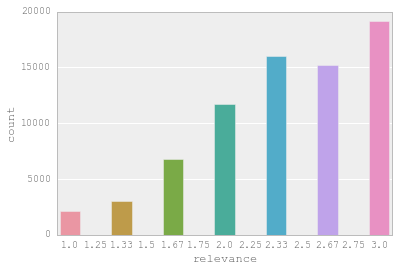

In [21]:
sns.countplot(x='relevance', data=df)

In [22]:
df['majority_relevance'] = df['relevance'].map(lambda x: x in [1.0, 1.33, 1.67, 2.0, 2.33, 2.67, 3.0])
def majoritize(df):
    return df[df['majority_relevance'] == 1]

## External Data Utilization

### Fix Typos

In [23]:
df['search_term'] = df['search_term'].map(correct_typo)

## Pre-Stemming Attributes Features

In [24]:
df['match_commercial'] = (df['search_term'].str.lower().str.contains('commercial') & df['flag_commercial']).astype(np.float)

In [25]:
sum(df['match_commercial'])

350.0

In [26]:
df['match_residential'] = (df['search_term'].str.lower().str.contains('residential') & df['flag_residential']).astype(np.float)

In [27]:
sum(df['match_residential'])

56.0

In [28]:
def filter_estar(df):
    return df['search_term'].str.lower().str.contains('energy star') |\
    df['search_term'].str.lower().str.contains('energy efficient')

In [29]:
df['match_estar'] = (filter_estar(df) & df['flag_residential']).astype(np.float)

In [30]:
sum(df['match_estar'])

60.0

In [31]:
df['match_indoor'] = (df['search_term'].str.lower().str.contains('indoor') & df['flag_indoor']).astype(np.float)

In [32]:
sum(df['match_indoor'])

591.0

In [33]:
df['match_outdoor'] = (df['search_term'].str.lower().str.contains('outdoor') & df['flag_outdoor']).astype(np.float)

In [34]:
sum(df['match_outdoor'])

3509.0

In [35]:
df['match_outdoor'].describe()

count    240760.000000
mean          0.014575
std           0.119843
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: match_outdoor, dtype: float64

## Stemming & Tokenizing

In [36]:
df['search_term'] = df['search_term'].map(lambda x: str_stem(x))
df['product_title'] = df['product_title'].map(lambda x: str_stem(x))
df['product_description'] = df['product_description'].map(lambda x: str_stem(x))
df['brand'] = df['brand'].map(lambda x: str_stem(x))
df['bullet'] = df['bullet'].map(lambda x: str_stem(x))

In [37]:
df['color'] = df['color'].map(lambda x: str_stem(x))
df['material'] = df['material'].map(lambda x: str_stem(x))

In [38]:
df['tokens_search_term'] = df['search_term'].map(lambda x: x.split())
df['tokens_product_title'] = df['product_title'].map(lambda x: x.split())
df['tokens_product_description'] = df['product_description'].map(lambda x: x.split())
df['tokens_brand'] = df['brand'].map(lambda x: x.split())
df['tokens_bullet'] = df['bullet'].map(lambda x: x.split())

Using a proper tokenizer is much slower and does not bring substantial improvment.

In [ ]:
# df['tokens_search_term'] = df['search_term'].map(lambda x: word_tokenize(x))
# df['tokens_product_title'] = df['product_title'].map(lambda x: word_tokenize(x))
# df['tokens_product_description'] = df['product_description'].map(lambda x: word_tokenize(x))
# df['tokens_brand'] = df['brand'].map(lambda x: word_tokenize(x))

## Meta-Features

### Length

In [45]:
df['len_search_term'] = df['tokens_search_term'].map(lambda x: len(x))
df['len_product_title'] = df['tokens_product_title'].map(lambda x: len(x))
df['len_product_description'] = df['tokens_product_description'].map(lambda x: len(x))
df['len_brand'] = df['tokens_brand'].map(lambda x: len(x))
df['len_bullet'] = df['tokens_bullet'].map(lambda x: len(x))

### Post-Stemming Attributes Features

In [39]:
def match_color(st, colors):
    for w in st:
        if w in colors:
            return True
    return False

In [40]:
df['match_color'] = df.apply(lambda x: match_color(x['tokens_search_term'], x['color']), axis=1).astype(np.float)

In [41]:
sum(df['match_color'])

19251.0

In [42]:
def match_material(st, materials):
    for w in st:
        if w in materials:
            return True
    return False

In [43]:
df['match_material'] = df.apply(lambda x: match_material(x['tokens_search_term'], x['material']), axis=1).astype(np.float)

In [44]:
sum(df['match_material'])

13907.0

### Flag & Count & Ratio

In [64]:
df['flag_st_in_pt'] = df.apply(lambda x: int(x['search_term'] in x['product_title']), axis=1)
df['flag_st_in_pd'] = df.apply(lambda x: int(x['search_term'] in x['product_description']), axis=1)
df['flag_st_in_br'] = df.apply(lambda x: int(x['search_term'] in x['brand']), axis=1)
df['flag_st_in_bl'] = df.apply(lambda x: int(x['search_term'] in x['bullet']), axis=1)

In [65]:
df['num_st_in_pt'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_product_title']))), axis=1)
df['num_st_in_pd'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_product_description']))), axis=1)
df['num_st_in_br'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_brand']))), axis=1)
df['num_st_in_bl'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_bullet']))), axis=1)

In [66]:
df['ratio_st_in_pt'] = \
    df.apply(lambda x: x['num_st_in_pt'] / float(x['len_search_term']), axis=1)
df['ratio_st_in_pd'] = \
    df.apply(lambda x: x['num_st_in_pd'] / float(x['len_search_term']), axis=1)
df['ratio_st_in_br'] = \
    df.apply(lambda x: x['num_st_in_br'] / float(x['len_search_term']), axis=1)
df['ratio_st_in_bl'] = \
    df.apply(lambda x: x['num_st_in_bl'] / float(x['len_search_term']), axis=1)

In [75]:
sns.set_palette("husl")

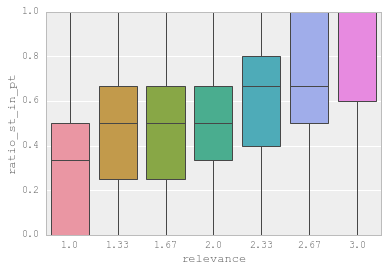

In [76]:
sns.boxplot(x='relevance', y='ratio_st_in_pt', data=majoritize(df))

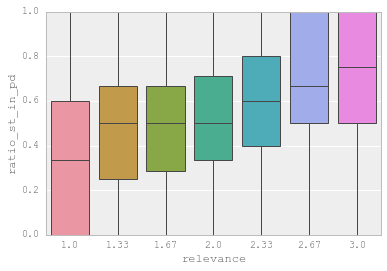

In [77]:
sns.boxplot(x='relevance', y='ratio_st_in_pd', data=majoritize(df))

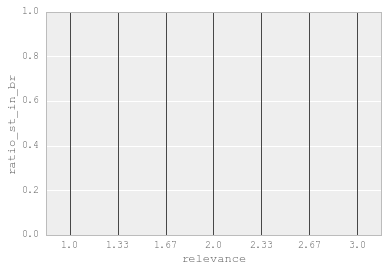

In [78]:
# not very useful
sns.boxplot(x='relevance', y='ratio_st_in_br', data=majoritize(df))

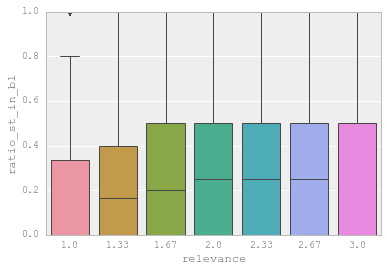

In [79]:
# not very useful
sns.boxplot(x='relevance', y='ratio_st_in_bl', data=majoritize(df))

### Positioned Word Matching

In [46]:
df['len_search_term'].max()

12

In [170]:
def match_pos(row, col, pos):
    if pos >= row['len_search_term'] or pos >= row['len_'+col]:
        return 0
    else:
        return int(row['tokens_search_term'][pos] in row[col])

In [171]:
for i in range(10):
    df[str(i)+'th_word_in_pt'] = df.apply(lambda x: match_pos(x, 'product_title', i), axis=1)

In [172]:
for i in range(10):
    df[str(i)+'th_word_in_pd'] = df.apply(lambda x: match_pos(x, 'product_description', i), axis=1)

In [173]:
for i in range(10):
    df[str(i)+'th_word_in_bl'] = df.apply(lambda x: match_pos(x, 'bullet', i), axis=1)

### Encode Brand Feature

In [80]:
brands = pd.unique(df.brand.ravel())
brand_encoder = {}
index = 1000
for brand in brands:
    brand_encoder[brand] = index
    index += 10
brand_encoder['nobrand'] = 500
df['brand_encoded'] = df['brand'].map(lambda x: brand_encoder.get(x, 500))

In [81]:
pid_with_attr_material = pd.unique(df_material.product_uid.ravel())
material_encoder = {}
for pid in pid_with_attr_material:
    material_encoder[pid] = 1
df['flag_attr_has_material'] = df['product_uid'].map(lambda x: material_encoder.get(x, 0)).astype(np.float)

In [82]:
pid_with_attr_color = pd.unique(df_color.product_uid.ravel())
color_encoder = {}
for pid in pid_with_attr_color:
    color_encoder[pid] = 1
df['flag_attr_has_color'] = df['product_uid'].map(lambda x: color_encoder.get(x, 0)).astype(np.float)

### Encode Attributes Feature

In [83]:
pids_with_attr = pd.unique(df_attr.product_uid.ravel())
attr_encoder = {}
for pid in pids_with_attr:
    attr_encoder[pid] = 1
df['flag_has_attr'] = df['product_uid'].map(lambda x: attr_encoder.get(x, 0)).astype(np.float)

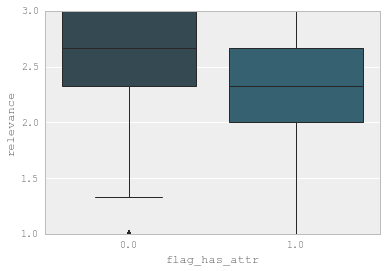

In [85]:
sns.boxplot(x='flag_has_attr', y='relevance', data=majoritize(df))

## Distance Metrics

### BOW

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
cv = CountVectorizer(stop_words='english', max_features=1000)

In [116]:
cv.fit(df['search_term'] + ' ' + df['product_title'] + ' ' + df['product_description'] + ' ' + df['bullet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [122]:
cv_of_st = cv.transform(df['search_term'])
cv_of_pt = cv.transform(df['product_title'])
cv_of_pd = cv.transform(df['product_description'])
cv_of_bl = cv.transform(df['bullet'])

### BOW based Cosine Similarity

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

In [129]:
cv_cos_sim_st_pt = [cosine_similarity(cv_of_st[i], cv_of_pt[i])[0][0] for i in range(cv_of_st.shape[0])]
cv_cos_sim_st_pd = [cosine_similarity(cv_of_st[i], cv_of_pd[i])[0][0] for i in range(cv_of_st.shape[0])]
cv_cos_sim_st_bl = [cosine_similarity(cv_of_st[i], cv_of_bl[i])[0][0] for i in range(cv_of_st.shape[0])]

In [132]:
df['cv_cos_sim_st_pt'] = cv_cos_sim_st_pt
df['cv_cos_sim_st_pd'] = cv_cos_sim_st_pd
df['cv_cos_sim_st_bl'] = cv_cos_sim_st_bl

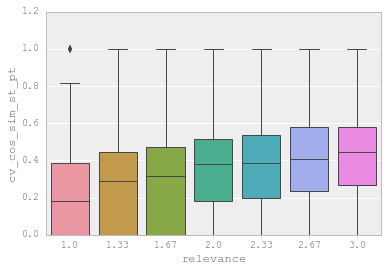

In [128]:
sns.boxplot(x='relevance', y='cv_cos_sim_st_pt', data=majoritize(df))

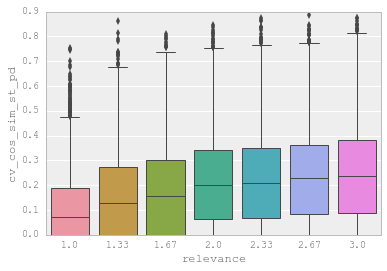

In [133]:
sns.boxplot(x='relevance', y='cv_cos_sim_st_pd', data=majoritize(df))

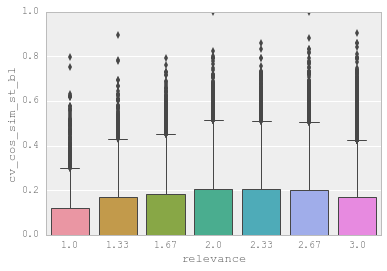

In [134]:
sns.boxplot(x='relevance', y='cv_cos_sim_st_bl', data=majoritize(df))

### TF-IDF

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
tiv = TfidfVectorizer(ngram_range=(1, 3), stop_words='english', max_features=1000)
tiv.fit(df['search_term'] + ' ' + df['product_title'] + ' ' + df['product_description'] + ' ' + df['bullet'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [137]:
tiv_of_st = tiv.transform(df['search_term'])
tiv_of_pt = tiv.transform(df['product_title'])
tiv_of_pd = tiv.transform(df['product_description'])
tiv_of_bl = tiv.transform(df['bullet'])

### TF-IDF based Cosine Similarity

In [ ]:
tiv_cos_sim_st_pt = [cosine_similarity(tiv_of_st[i], tiv_of_pt[i])[0][0] for i in range(tiv_of_st.shape[0])]
tiv_cos_sim_st_pd = [cosine_similarity(tiv_of_st[i], tiv_of_pd[i])[0][0] for i in range(tiv_of_st.shape[0])]
tiv_cos_sim_st_bl = [cosine_similarity(tiv_of_st[i], tiv_of_bl[i])[0][0] for i in range(tiv_of_st.shape[0])]

In [ ]:
df['tiv_cos_sim_st_pt'] = tiv_cos_sim_st_pt
df['tiv_cos_sim_st_pd'] = tiv_cos_sim_st_pd
df['tiv_cos_sim_st_bl'] = tiv_cos_sim_st_bl

In [ ]:
sns.boxplot(x='relevance', y='tiv_cos_sim_st_pt', data=majoritize(df))

In [ ]:
sns.boxplot(x='relevance', y='tiv_cos_sim_st_pd', data=majoritize(df))

In [ ]:
sns.boxplot(x='relevance', y='tiv_cos_sim_st_bl', data=majoritize(df))

### Jaccard Similarity

In [138]:
def jaccard(A, B):
    C = A.intersection(B)
    return float(len(C)) / (len(A) + len(B) - len(C))

In [139]:
df['jaccard_st_pt'] = df.apply(lambda x: jaccard(set(x['tokens_search_term']), set(x['tokens_product_title'])), axis=1)
df['jaccard_st_pd'] = df.apply(lambda x: jaccard(set(x['tokens_search_term']), set(x['tokens_product_description'])), axis=1)    
df['jaccard_st_br'] = df.apply(lambda x: jaccard(set(x['tokens_search_term']), set(x['tokens_brand'])), axis=1)
df['jaccard_st_bl'] = df.apply(lambda x: jaccard(set(x['tokens_search_term']), set(x['tokens_bullet'])), axis=1)

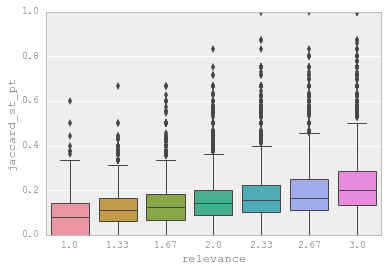

In [140]:
sns.boxplot(x='relevance', y='jaccard_st_pt', data=majoritize(df))

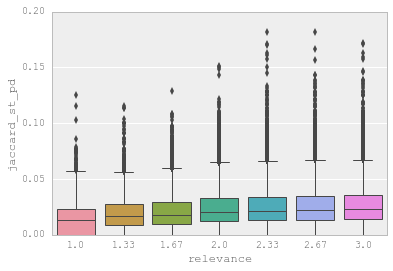

In [141]:
sns.boxplot(x='relevance', y='jaccard_st_pd', data=majoritize(df))

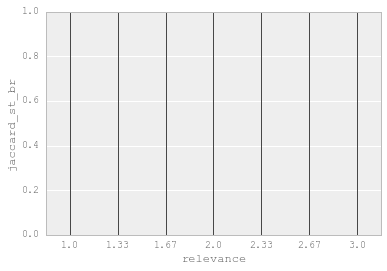

In [142]:
sns.boxplot(x='relevance', y='jaccard_st_br', data=majoritize(df))

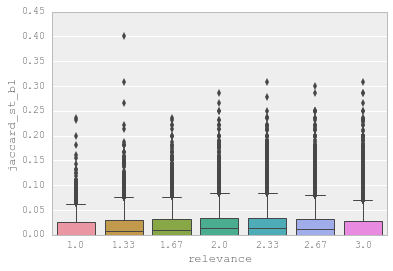

In [143]:
sns.boxplot(x='relevance', y='jaccard_st_bl', data=majoritize(df))

### Edit Distance

In [154]:
from nltk.metrics import edit_distance

In [186]:
def calc_edit_distance(row, col):
    dists = [min([edit_distance(w, x) for x in row['tokens_'+col]]) for w in row['tokens_search_term']]
    return (min(dists), sum(dists)) if dists 

In [187]:
df['edit_dist_st_pt_raw'] = df.apply(lambda x: calc_edit_distance(x, 'product_title'), axis=1)

In [189]:
df['edit_dist_st_pt_min'] = df['edit_dist_st_pt_raw'].map(lambda x: x[0])
df['edit_dist_st_pt_avg'] = df['edit_dist_st_pt_raw'].map(lambda x: x[1]) / df['len_search_term']

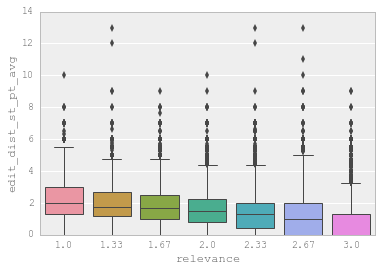

In [194]:
sns.boxplot(x='relevance', y='edit_dist_st_pt_avg', data=majoritize(df))

In [ ]:
df['edit_dist_st_pd_raw'] = df.apply(lambda x: calc_edit_distance(x, 'product_description'), axis=1)

In [214]:
df['edit_dist_st_pd_min'] = df['edit_dist_st_pd_raw'].map(lambda x: x[0])
df['edit_dist_st_pd_avg'] = df['edit_dist_st_pd_raw'].map(lambda x: x[1]) / df['len_search_term']

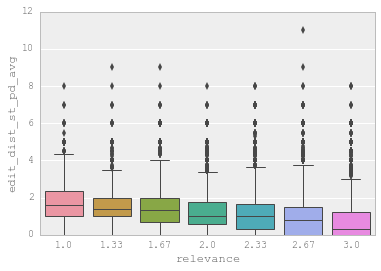

In [215]:
sns.boxplot(x='relevance', y='edit_dist_st_pd_avg', data=majoritize(df))

In [216]:
df.drop(['edit_dist_st_pt_raw', 'edit_dist_st_pd_raw'], axis=1, inplace=True)

In [ ]:
# df['edit_dist_st_bl_raw'] = df.apply(lambda x: calc_edit_distance(x, 'bullet'), axis=1)
# df['edit_dist_st_br_raw'] = df.apply(lambda x: calc_edit_distance(x, 'brand'), axis=1)
# df['edit_dist_st_bl_min'] = df['edit_dist_st_bl_raw'].map(lambda x: x[0])
# df['edit_dist_st_bl_avg'] = df['edit_dist_st_bl_raw'].map(lambda x: x[1]) / df['len_search_term']
# df['edit_dist_st_br_min'] = df['edit_dist_st_br_raw'].map(lambda x: x[0])
# df['edit_dist_st_br_avg'] = df['edit_dist_st_br_raw'].map(lambda x: x[1]) / df['len_search_term']

## Latent Semantic Space

By SVD-decomposing BOW / TF-IDF matrix, we obtain features that can be used to capture different query/product groups.

In [144]:
from sklearn.decomposition import TruncatedSVD

In [145]:
tsvd = TruncatedSVD(n_components=10, random_state=2016)

### tSVD for BOW

In [146]:
st_bow_tsvd = tsvd.fit_transform(cv_of_st)
for i in range(st_bow_tsvd.shape[1]):
    df['st_bow_tsvd'+str(i)] = st_bow_tsvd[:,i]

In [147]:
pt_bow_tsvd = tsvd.fit_transform(cv_of_pt)
for i in range(pt_bow_tsvd.shape[1]):
    df['pt_bow_tsvd'+str(i)] = pt_bow_tsvd[:,i]

In [148]:
pd_bow_tsvd = tsvd.fit_transform(cv_of_pd)
for i in range(pd_bow_tsvd.shape[1]):
    df['pd_bow_tsvd'+str(i)] = pd_bow_tsvd[:,i]

In [149]:
bl_bow_tsvd = tsvd.fit_transform(cv_of_bl)
for i in range(bl_bow_tsvd.shape[1]):
    df['bl_bow_tsvd'+str(i)] = bl_bow_tsvd[:,i]

### tSVD for TF-IDF

In [150]:
st_tfidf_tsvd = tsvd.fit_transform(tiv_of_st)
for i in range(st_tfidf_tsvd.shape[1]):
    df['st_tfidf_tsvd_'+str(i)] = st_tfidf_tsvd[:,i]

In [151]:
pt_tfidf_tsvd = tsvd.fit_transform(tiv_of_pt)
for i in range(pt_tfidf_tsvd.shape[1]):
    df['pt_tfidf_tsvd_'+str(i)] = pt_tfidf_tsvd[:,i]

In [152]:
pd_tfidf_tsvd = tsvd.fit_transform(tiv_of_pd)
for i in range(pd_tfidf_tsvd.shape[1]):
    df['pd_tfidf_tsvd_'+str(i)] = pd_tfidf_tsvd[:,i]

In [153]:
bl_tfidf_tsvd = tsvd.fit_transform(tiv_of_bl)
for i in range(bl_tfidf_tsvd.shape[1]):
    df['bl_tfidf_tsvd_'+str(i)] = bl_tfidf_tsvd[:,i]

## Append

**This part is due to some mess I made. Just ignore it.**

In [156]:
append = pd.read_csv('df_lev_dist_more_jaccard.csv', encoding='ISO-8859-1')

In [157]:
cols_to_append = [
    'query_in_title',
    'query_in_description',
    'query_last_word_in_title',
    'query_last_word_in_description',
    'word_in_title',
    'word_in_description',
    'word_in_brand',
    'ratio_title',
    'ratio_description',
    'ratio_brand',
    'lev_dist_to_product_title_min',
    'lev_dist_to_product_title_max',
    'lev_dist_to_product_title_sum',
    'lev_dist_to_product_description_min',
    'lev_dist_to_product_description_max',
    'lev_dist_to_product_description_sum'
]

In [158]:
for x in cols_to_append:
    df['old_'+x] = append[x]

## Export

In [217]:
cols_to_drop = [
    #'product_uid',
    'search_term',
    'product_title',
    'product_description',
    'brand',
    'bullet',
    'color',
    'material',    
    'tokens_search_term',
    'tokens_product_title',
    'tokens_product_description',
    'tokens_brand',
    'tokens_bullet',
    'majority_relevance'
]
export_df = df.drop(cols_to_drop, axis=1)
print('Number of Features: ', len(export_df.columns.tolist()) - 2)

Number of Features:  172


In [218]:
export_df.head(3)

,id,product_uid,relevance,bullet_count,flag_commercial,flag_residential,flag_indoor,flag_outdoor,flag_estar,match_commercial,match_residential,match_estar,match_indoor,match_outdoor,match_color,match_material,len_search_term,len_product_title,len_product_description,len_brand,len_bullet,0th_word_in_pd,1th_word_in_pd,2th_word_in_pd,3th_word_in_pd,4th_word_in_pd,5th_word_in_pd,6th_word_in_pd,7th_word_in_pd,8th_word_in_pd,9th_word_in_pd,0th_word_in_bl,1th_word_in_bl,2th_word_in_bl,3th_word_in_bl,4th_word_in_bl,5th_word_in_bl,6th_word_in_bl,7th_word_in_bl,8th_word_in_bl,9th_word_in_bl,0th_word_in_pt,1th_word_in_pt,2th_word_in_pt,3th_word_in_pt,4th_word_in_pt,5th_word_in_pt,6th_word_in_pt,7th_word_in_pt,8th_word_in_pt,9th_word_in_pt,flag_st_in_pt,flag_st_in_pd,flag_st_in_br,flag_st_in_bl,num_st_in_pt,num_st_in_pd,num_st_in_br,num_st_in_bl,ratio_st_in_pt,ratio_st_in_pd,ratio_st_in_br,ratio_st_in_bl,brand_encoded,flag_attr_has_material,flag_attr_has_color,flag_has_attr,cv_cos_sim_st_pt,cv_cos_sim_st_pd,cv_cos_sim_st_bl,jaccard_st_pt,jaccard_st_pd,jaccard_st_br,jaccard_st_bl,st_bow_tsvd0,st_bow_tsvd1,st_bow_tsvd2,st_bow_tsvd3,st_bow_tsvd4,st_bow_tsvd5,st_bow_tsvd6,st_bow_tsvd7,st_bow_tsvd8,st_bow_tsvd9,pt_bow_tsvd0,pt_bow_tsvd1,pt_bow_tsvd2,pt_bow_tsvd3,pt_bow_tsvd4,pt_bow_tsvd5,pt_bow_tsvd6,pt_bow_tsvd7,pt_bow_tsvd8,pt_bow_tsvd9,pd_bow_tsvd0,pd_bow_tsvd1,pd_bow_tsvd2,pd_bow_tsvd3,pd_bow_tsvd4,pd_bow_tsvd5,pd_bow_tsvd6,pd_bow_tsvd7,pd_bow_tsvd8,pd_bow_tsvd9,bl_bow_tsvd0,bl_bow_tsvd1,bl_bow_tsvd2,bl_bow_tsvd3,bl_bow_tsvd4,bl_bow_tsvd5,bl_bow_tsvd6,bl_bow_tsvd7,bl_bow_tsvd8,bl_bow_tsvd9,st_tfidf_tsvd_0,st_tfidf_tsvd_1,st_tfidf_tsvd_2,st_tfidf_tsvd_3,st_tfidf_tsvd_4,st_tfidf_tsvd_5,st_tfidf_tsvd_6,st_tfidf_tsvd_7,st_tfidf_tsvd_8,st_tfidf_tsvd_9,pt_tfidf_tsvd_0,pt_tfidf_tsvd_1,pt_tfidf_tsvd_2,pt_tfidf_tsvd_3,pt_tfidf_tsvd_4,pt_tfidf_tsvd_5,pt_tfidf_tsvd_6,pt_tfidf_tsvd_7,pt_tfidf_tsvd_8,pt_tfidf_tsvd_9,pd_tfidf_tsvd_0,pd_tfidf_tsvd_1,pd_tfidf_tsvd_2,pd_tfidf_tsvd_3,pd_tfidf_tsvd_4,pd_tfidf_tsvd_5,pd_tfidf_tsvd_6,pd_tfidf_tsvd_7,pd_tfidf_tsvd_8,pd_tfidf_tsvd_9,bl_tfidf_tsvd_0,bl_tfidf_tsvd_1,bl_tfidf_tsvd_2,bl_tfidf_tsvd_3,bl_tfidf_tsvd_4,bl_tfidf_tsvd_5,bl_tfidf_tsvd_6,bl_tfidf_tsvd_7,bl_tfidf_tsvd_8,bl_tfidf_tsvd_9,old_query_in_title,old_query_in_description,old_query_last_word_in_title,old_query_last_word_in_description,old_word_in_title,old_word_in_description,old_word_in_brand,old_ratio_title,old_ratio_description,old_ratio_brand,old_lev_dist_to_product_title_min,old_lev_dist_to_product_title_max,old_lev_dist_to_product_title_sum,old_lev_dist_to_product_description_min,old_lev_dist_to_product_description_max,old_lev_dist_to_product_description_sum,edit_dist_st_pt_min,edit_dist_st_pt_avg,edit_dist_st_pd_min,edit_dist_st_pd_avg
0,2,100001,3.0,7,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,2,6,135,3,58,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.5,0.5,0,0.5,1000,1,0,1,0.316228,0.197814,0.096225,0.142857,0.010101,0,0.020833,0.003626,0.004019,0.000797,0.006102,0.008658,-0.000548,0.006355,-0.002796,0.007951,0.005769,0.045605,0.024936,0.026892,0.028064,0.049714,0.092839,-0.078192,-0.067007,0.050241,0.049224,3.313323,-1.080023,0.246664,0.035078,1.213365,0.344366,-0.339457,-0.778180,1.311161,-0.855836,2.016449,-0.805119,1.716349,-0.538509,1.614636,0.482738,0.415191,-0.226891,-0.103242,-0.652989,0.003235,0.001598,0.004377,0.004809,0.003127,0.001640,-0.000262,0.010862,0.003171,-0.000317,0.040224,-0.002031,-0.002297,-0.031202,0.025376,0.031313,0.013203,0.000737,-0.007120,0.007481,0.224923,-0.004951,0.010509,-0.007065,-0.100198,-0.059775,-0.120487,-0.041719,0.115705,-0.026294,0.190741,-0.004078,0.002348,-0.025698,-0.087801,0.007791,-0.176249,-0.059840,0.028053,-0.022842,0,0,0,0,1,1,0,0.5,0.5,0.00,3,7,63,3,16,321,0,3.0,0,2.0
1,3,100001,2.5,7,-1,-1,-1,-1,-1,0,0,0,0,0,0,1,2,6,135,3,58,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,1000,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.

In [219]:
export_df.to_csv('./df.csv')

In [220]:
df.to_csv('./df_full.csv')